In [57]:
from PIL import Image
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import numpy as np
from math import sqrt

im = Image.open("plot.png")
pix = im.load()

colors = [
    (254, 254, 254),
    (28, 25, 26),
    (140, 139, 137),
    (34, 163, 207),
    (249, 219, 127),
]

dots_on_plot = []
for x_index in range(im.size[0]):
    for y_index in range(im.size[1]):
        r, g, b, a = pix[x_index, y_index]
        # check color
        color_dist = 255 * 3
        color_similar = None
        for color_item in colors:
            cr, cg, cb = color_item
            if (sqrt((cr - r)**2 + (cg - g)**2 + (cb - b)**2)) < color_dist:
                color_dist = sqrt((cr - r)**2 + (cg - g)**2 + (cb - b)**2)
                color_similar = color_item
        if color_similar != colors[4]:
            continue
        if b > 140:
            continue
        dots_on_plot.append((x_index, y_index))


# print(dots_on_plot)
# print(len(dots_on_plot))

x_ave = 0
y_ave = 0
for dot in dots_on_plot:
    x, y = dot
    x_ave += x
    y_ave += y
x_ave /= len(dots_on_plot) * 1.0
y_ave /= len(dots_on_plot) * 1.0
x_ave, y_ave = int(x_ave), int(y_ave)

for index in range(len(dots_on_plot)):
    x, y = dots_on_plot[index]
    dots_on_plot[index] = (x - x_ave, y - y_ave)

In [58]:
part_a = []
part_b = []
part_c = []
part_d = []

for (x, y) in dots_on_plot:
    if x >= 0 and y >= 0:
        part_a.append((x, y))
    elif x <= 0 and y >= 0:
        part_b.append((x, y))
    elif x <= 0 and y <= 0:
        part_c.append((x, y))
    elif x >= 0 and y <= 0:
        part_d.append((x, y))

part_a.sort()
part_b.sort()
part_c.sort()
part_d.sort()

[None]

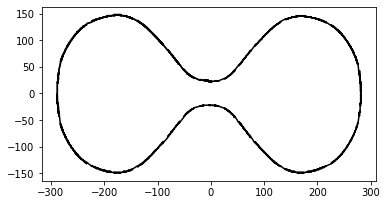

In [59]:

    
fig, ax = plt.subplots()
ax.plot([x for (x, y) in part_a], [y for (x, y) in part_a], "k")
ax.plot([x for (x, y) in part_b], [y for (x, y) in part_b], "k")
ax.plot([x for (x, y) in part_c], [y for (x, y) in part_c], "k")
ax.plot([x for (x, y) in part_b], [y for (x, y) in part_b], "k")
ax.plot([x for (x, y) in part_d], [y for (x, y) in part_d], "k")
ax.set(aspect=1)


[None]

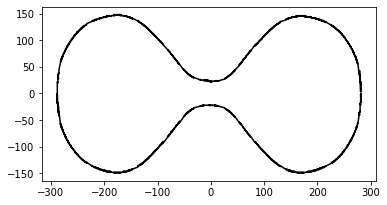

In [60]:
def smooth_arr(arr):
    index = 1
    while index < len(arr):
        if ((arr[index][0] - arr[index - 1][0]) ** 2 + (arr[index][1] - arr[index - 1][1]) ** 2) > 6 or abs(arr[index][1] - arr[index - 1][1]) > 2:
            arr.pop(index)
        index += 1
    return arr
            
part_a = smooth_arr(part_a)
part_b = smooth_arr(part_b)
part_c = smooth_arr(part_c)
part_d = smooth_arr(part_d)

fig, ax = plt.subplots()
ax.plot([x for (x, y) in part_a], [y for (x, y) in part_a], "k")
ax.plot([x for (x, y) in part_c], [y for (x, y) in part_c], "k")
ax.plot([x for (x, y) in part_b], [y for (x, y) in part_b], "k")
ax.plot([x for (x, y) in part_d], [y for (x, y) in part_d], "k")
ax.set(aspect=1)